## Step 1: Understand your data?

- Data format?
- Missing data?
- Outliers?

## Step 2: What is my aim?

- Discover drivers of Churn?
- Why do we care about the Churn?

## Step 3: What is my initial hypothesis (gut feel/domain knowlege/literature survey)

- Higher monthly charges leads to higher churn?
- Non-senior citizens churn at higher rate
- More the services, less the churn?

### Exploratory question?

- How is churn differnt by service type?
- How is churn different by Contract type?
- How is churn different by payment type?

In [1]:
#Environment Set up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
#import data
df = pd.read_csv('u_customer.csv')

df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_churned,has_phone_and_internet,has_phone,has_internet,Concat Partners,partner_dependents,p_d_str,Tenure_bucket,Avg_ten_charge_check,Phone_internet_both
0,0002-ORFBO,Female,0.0,Yes,Yes,1.0,1.0,1.0,Mailed check,65.6,...,False,True,True,True,YesYes,3.0,Par Dep,0-24,65.92222222,Both
1,0003-MKNFE,Male,0.0,No,No,2.0,1.0,0.0,Mailed check,59.9,...,False,True,True,True,NoNo,0.0,No Part No Dep,0-24,60.26666667,Both
2,0004-TLHLJ,Male,0.0,No,No,1.0,2.0,0.0,Electronic check,73.9,...,True,True,True,True,NoNo,0.0,No Part No Dep,0-24,70.2125,Both
3,0011-IGKFF,Male,1.0,Yes,No,1.0,2.0,0.0,Electronic check,98.0,...,True,True,True,True,YesNo,1.0,Part No Dep,0-24,95.21923077,Both
4,0013-EXCHZ,Female,1.0,Yes,No,1.0,2.0,0.0,Mailed check,83.9,...,True,True,True,True,YesNo,1.0,Part No Dep,0-24,89.13333333,Both


### Step 1: Understand your data?
- Data format?
- Missing data?
- Outliers?

In [3]:
# Clean data (specifically NA or null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7049 non-null   object 
 1   gender                  7049 non-null   object 
 2   is_senior_citizen       7049 non-null   float64
 3   partner                 7049 non-null   object 
 4   dependents              7049 non-null   object 
 5   phone_service           7049 non-null   float64
 6   internet_service        7049 non-null   float64
 7   contract_type           7049 non-null   float64
 8   payment_type            7049 non-null   object 
 9   monthly_charges         7049 non-null   float64
 10  total_charges           7038 non-null   float64
 11  churn                   7049 non-null   object 
 12  tenure                  7049 non-null   float64
 13  contract_type2          7049 non-null   object 
 14  Phone_type              7049 non-null   

In [4]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7038 entries, 0 to 7048
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7038 non-null   object 
 1   gender                  7038 non-null   object 
 2   is_senior_citizen       7038 non-null   float64
 3   partner                 7038 non-null   object 
 4   dependents              7038 non-null   object 
 5   phone_service           7038 non-null   float64
 6   internet_service        7038 non-null   float64
 7   contract_type           7038 non-null   float64
 8   payment_type            7038 non-null   object 
 9   monthly_charges         7038 non-null   float64
 10  total_charges           7038 non-null   float64
 11  churn                   7038 non-null   object 
 12  tenure                  7038 non-null   float64
 13  contract_type2          7038 non-null   object 
 14  Phone_type              7038 non-null   

In [5]:
# Update types to categorical data
df['phone_service'] = df.phone_service.replace([0,1,2], ['no_phone', 'one_line', 'two_p_phone'])
df['internet_service'] = df.internet_service.replace([0,1,2], ['No_internet', 'DSL', 'Fiber'])
df['contract_type'] = df.contract_type.replace([0,1,2],['Month_to_month', '1year', '2year'])
df['is_senior_citizen'] = df.is_senior_citizen.replace([0,1], ['No', 'Yes'])
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_churned,has_phone_and_internet,has_phone,has_internet,Concat Partners,partner_dependents,p_d_str,Tenure_bucket,Avg_ten_charge_check,Phone_internet_both
0,0002-ORFBO,Female,No,Yes,Yes,one_line,DSL,1year,Mailed check,65.6,...,False,True,True,True,YesYes,3.0,Par Dep,0-24,65.92222222,Both
1,0003-MKNFE,Male,No,No,No,two_p_phone,DSL,Month_to_month,Mailed check,59.9,...,False,True,True,True,NoNo,0.0,No Part No Dep,0-24,60.26666667,Both
2,0004-TLHLJ,Male,No,No,No,one_line,Fiber,Month_to_month,Electronic check,73.9,...,True,True,True,True,NoNo,0.0,No Part No Dep,0-24,70.2125,Both
3,0011-IGKFF,Male,Yes,Yes,No,one_line,Fiber,Month_to_month,Electronic check,98.0,...,True,True,True,True,YesNo,1.0,Part No Dep,0-24,95.21923077,Both
4,0013-EXCHZ,Female,Yes,Yes,No,one_line,Fiber,Month_to_month,Mailed check,83.9,...,True,True,True,True,YesNo,1.0,Part No Dep,0-24,89.13333333,Both


In [6]:
df.internet_service.value_counts()

Fiber          3098
DSL            2417
No_internet    1523
Name: internet_service, dtype: int64

In [7]:
df.describe()

,monthly_charges,total_charges,tenure,partner_dependents
count,7038.000000,7038.000000,7038.000000,7038.000000
mean,64.783475,2283.043883,32.425405,1.080705
std,30.095424,2266.521984,24.582500,1.225827
min,18.250000,18.800000,1.000000,0.000000
25%,35.512500,401.587500,9.000000,0.000000
50%,70.350000,1397.100000,29.000000,1.000000
75%,89.887500,3793.775000,55.000000,2.000000
max,118.750000,8684.800000,79.000000,3.000000


In [8]:
# what datatype is your garget variable? Church = categorical
# Numerica continuous variables: monthly_charges, total_charges, tenure
# catigorical variables: gender, is_senior, partner, dependents, types...

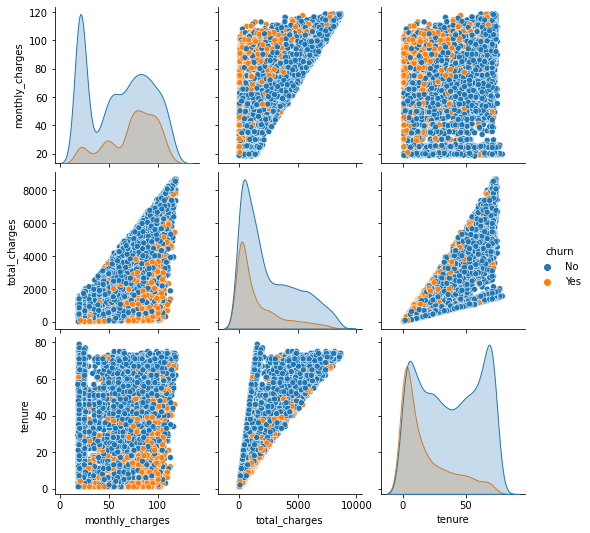

In [9]:
sns.pairplot(df[['monthly_charges', 'total_charges', 'tenure', 'churn']], hue = 'churn')

In [50]:
# Tenure vs. Churn
df.groupby('churn').tenure.mean()

churn
No     37.657508
Yes    17.965775
Name: tenure, dtype: float64

In [10]:
# mean monthly charges for customers who churn vs who don't churn?

df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_churned,has_phone_and_internet,has_phone,has_internet,Concat Partners,partner_dependents,p_d_str,Tenure_bucket,Avg_ten_charge_check,Phone_internet_both
0,0002-ORFBO,Female,No,Yes,Yes,one_line,DSL,1year,Mailed check,65.6,...,False,True,True,True,YesYes,3.0,Par Dep,0-24,65.92222222,Both
1,0003-MKNFE,Male,No,No,No,two_p_phone,DSL,Month_to_month,Mailed check,59.9,...,False,True,True,True,NoNo,0.0,No Part No Dep,0-24,60.26666667,Both
2,0004-TLHLJ,Male,No,No,No,one_line,Fiber,Month_to_month,Electronic check,73.9,...,True,True,True,True,NoNo,0.0,No Part No Dep,0-24,70.2125,Both
3,0011-IGKFF,Male,Yes,Yes,No,one_line,Fiber,Month_to_month,Electronic check,98.0,...,True,True,True,True,YesNo,1.0,Part No Dep,0-24,95.21923077,Both
4,0013-EXCHZ,Female,Yes,Yes,No,one_line,Fiber,Month_to_month,Mailed check,83.9,...,True,True,True,True,YesNo,1.0,Part No Dep,0-24,89.13333333,Both


In [11]:
df.groupby('churn').monthly_charges.mean()

churn
No     61.297359
Yes    74.417834
Name: monthly_charges, dtype: float64

<AxesSubplot:xlabel='churn', ylabel='monthly_charges'>

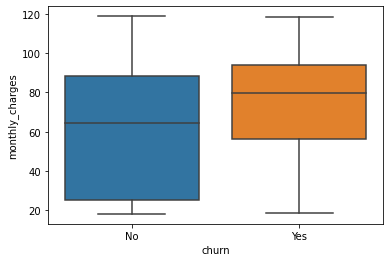

In [12]:
sns.boxplot(data = df, y ='monthly_charges', x ='churn')

<AxesSubplot:xlabel='churn', ylabel='tenure'>

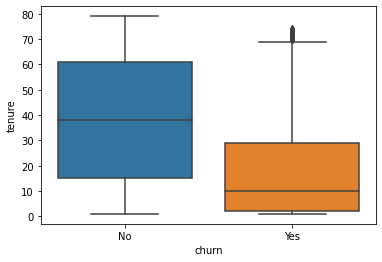

In [13]:
sns.boxplot(data = df, y = 'tenure', x = 'churn')

In [14]:
# categorical vs categorical

pd.crosstab(df.gender, df.churn, normalize = 'index')

churn,No,Yes
gender,,
Female,0.730350,0.269650
Male,0.738176,0.261824


In [15]:
pd.crosstab(df.dependents, df.contract_type, margins = True)

contract_type,1year,2year,Month_to_month,All
dependents,,,,
No,943,905,3086,4934
Yes,532,782,790,2104
All,1475,1687,3876,7038


In [16]:
pd.crosstab(df.dependents, df.contract_type, normalize = 'index')

contract_type,1year,2year,Month_to_month
dependents,,,
No,0.191123,0.183421,0.625456
Yes,0.252852,0.371673,0.375475


In [17]:
ctab_cont_type= pd.crosstab(df.contract_type, df.churn, normalize='index')

<AxesSubplot:ylabel='contract_type'>

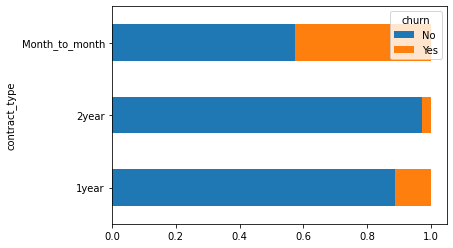

In [18]:
ctab_cont_type.plot(kind = 'barh', stacked = True)

In [19]:
pd.crosstab(df.is_senior_citizen, df.churn, normalize = 'index')

churn,No,Yes
is_senior_citizen,,
No,0.763569,0.236431
Yes,0.583187,0.416813


In [20]:
pd.crosstab(df.is_senior_citizen, df.churn)

churn,No,Yes
is_senior_citizen,,
No,4502,1394
Yes,666,476


In [21]:
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_churned,has_phone_and_internet,has_phone,has_internet,Concat Partners,partner_dependents,p_d_str,Tenure_bucket,Avg_ten_charge_check,Phone_internet_both
0,0002-ORFBO,Female,No,Yes,Yes,one_line,DSL,1year,Mailed check,65.6,...,False,True,True,True,YesYes,3.0,Par Dep,0-24,65.92222222,Both
1,0003-MKNFE,Male,No,No,No,two_p_phone,DSL,Month_to_month,Mailed check,59.9,...,False,True,True,True,NoNo,0.0,No Part No Dep,0-24,60.26666667,Both
2,0004-TLHLJ,Male,No,No,No,one_line,Fiber,Month_to_month,Electronic check,73.9,...,True,True,True,True,NoNo,0.0,No Part No Dep,0-24,70.2125,Both
3,0011-IGKFF,Male,Yes,Yes,No,one_line,Fiber,Month_to_month,Electronic check,98.0,...,True,True,True,True,YesNo,1.0,Part No Dep,0-24,95.21923077,Both
4,0013-EXCHZ,Female,Yes,Yes,No,one_line,Fiber,Month_to_month,Mailed check,83.9,...,True,True,True,True,YesNo,1.0,Part No Dep,0-24,89.13333333,Both


In [22]:
df.groupby('phone_service').sum()

,monthly_charges,total_charges,tenure,partner_dependents
phone_service,,,,
no_phone,28585.4,1020325.45,21646.0,720.0
one_line,183815.2,4581048.55,82017.0,3513.0
two_p_phone,243545.5,10466688.85,124547.0,3373.0


In [23]:
# Multiple Pairplots for insight

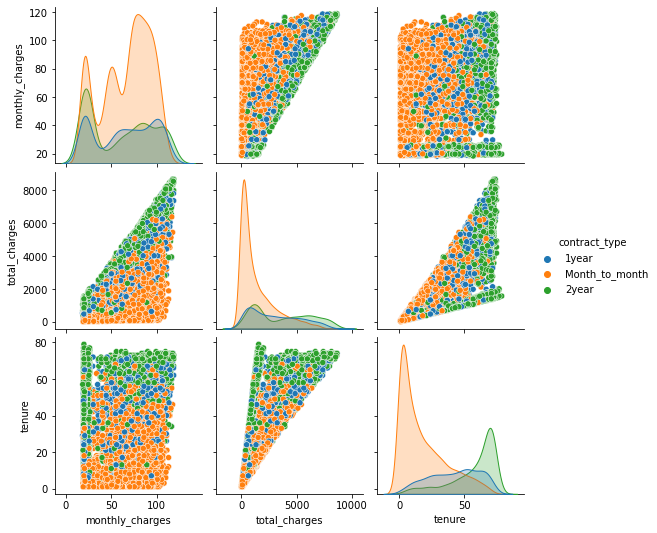

In [24]:
# Tenure Analysis and contract type for trends
sns.pairplot(df[['monthly_charges', 'total_charges', 'tenure', 'contract_type']], hue = 'contract_type')

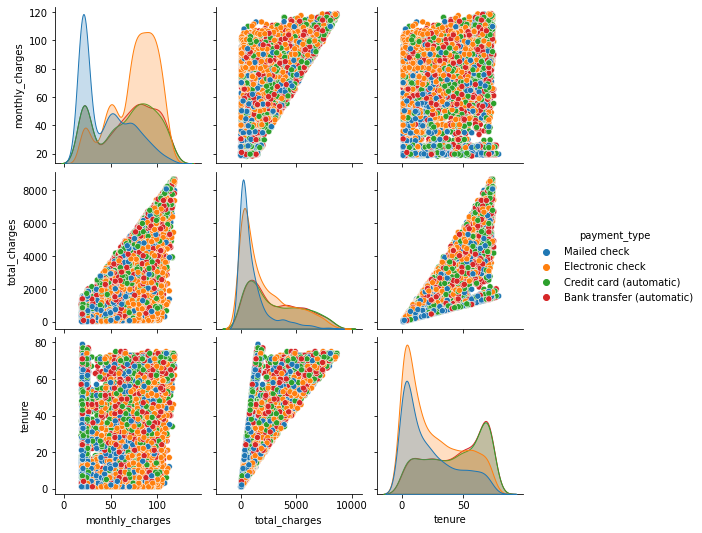

In [25]:
#Payment type & tenure Analysis for trends: no significant findings
sns.pairplot(df[['monthly_charges', 'total_charges', 'tenure', 'payment_type']], hue = 'payment_type')

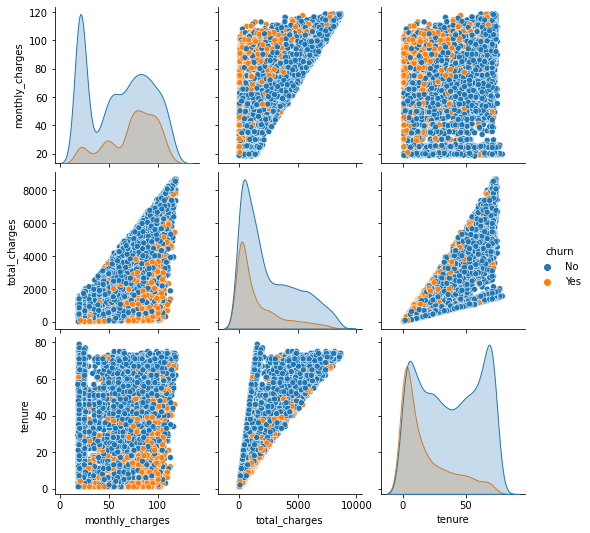

In [26]:
# Churn and Charges 
sns.pairplot(df[['monthly_charges', 'total_charges', 'tenure', 'churn']], hue = 'churn')

In [27]:
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_churned,has_phone_and_internet,has_phone,has_internet,Concat Partners,partner_dependents,p_d_str,Tenure_bucket,Avg_ten_charge_check,Phone_internet_both
0,0002-ORFBO,Female,No,Yes,Yes,one_line,DSL,1year,Mailed check,65.6,...,False,True,True,True,YesYes,3.0,Par Dep,0-24,65.92222222,Both
1,0003-MKNFE,Male,No,No,No,two_p_phone,DSL,Month_to_month,Mailed check,59.9,...,False,True,True,True,NoNo,0.0,No Part No Dep,0-24,60.26666667,Both
2,0004-TLHLJ,Male,No,No,No,one_line,Fiber,Month_to_month,Electronic check,73.9,...,True,True,True,True,NoNo,0.0,No Part No Dep,0-24,70.2125,Both
3,0011-IGKFF,Male,Yes,Yes,No,one_line,Fiber,Month_to_month,Electronic check,98.0,...,True,True,True,True,YesNo,1.0,Part No Dep,0-24,95.21923077,Both
4,0013-EXCHZ,Female,Yes,Yes,No,one_line,Fiber,Month_to_month,Mailed check,83.9,...,True,True,True,True,YesNo,1.0,Part No Dep,0-24,89.13333333,Both


<AxesSubplot:xlabel='churn', ylabel='tenure'>

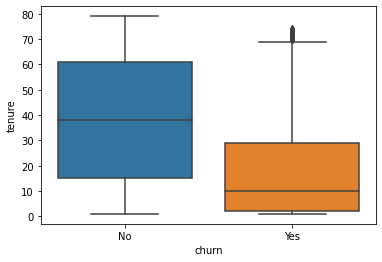

In [28]:
#churn rate vs tenure
sns.boxplot(data = df, y = 'tenure', x = 'churn')

### Exploratory question?
- How is churn differnt by service type?
- How is churn different by Contract type?
- How is churn different by payment type?

In [29]:
#Internet vs Churn
pd.crosstab(df.internet_service, df.churn, normalize = 'index')

churn,No,Yes
internet_service,,
DSL,0.809681,0.190319
Fiber,0.581343,0.418657
No_internet,0.925804,0.074196


<AxesSubplot:xlabel='internet_service'>

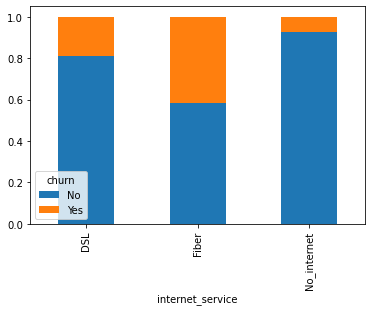

In [30]:
# Bar Plt
c_tab_is_c = pd.crosstab(df.internet_service, df.churn, normalize = 'index')
c_tab_is_c.plot(kind = 'bar', stacked = True)

In [31]:
#phone vs Churn
pd.crosstab(df.phone_service, df.churn, normalize = 'index')

churn,No,Yes
phone_service,,
no_phone,0.748899,0.251101
one_line,0.749558,0.250442
two_p_phone,0.713515,0.286485


<AxesSubplot:xlabel='phone_service'>

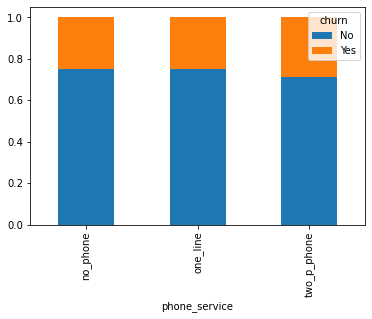

In [32]:
pc_c_tab = pd.crosstab(df.phone_service, df.churn, normalize = 'index')
pc_c_tab.plot(kind = 'bar', stacked = True)

In [33]:
#Payment Type info by gender : no significant findings
pd.crosstab(df.gender, df.churn, normalize = 'index')

churn,No,Yes
gender,,
Female,0.730350,0.269650
Male,0.738176,0.261824


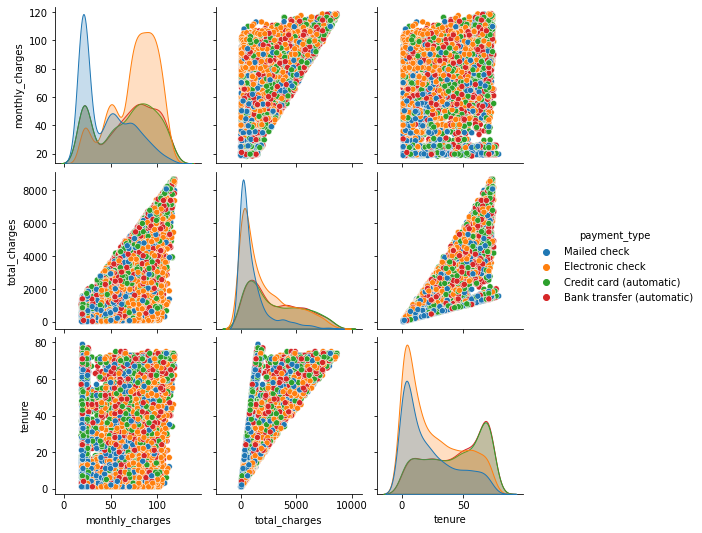

In [34]:
#Payment type and tenue: No significant findings
sns.pairplot(df[['monthly_charges', 'total_charges', 'tenure', 'payment_type']], hue = 'payment_type')

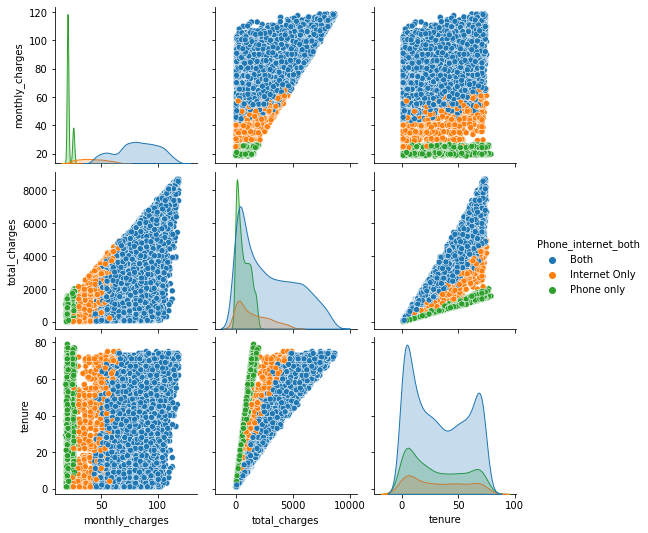

In [35]:
sns.pairplot(df[['monthly_charges', 'total_charges', 'tenure', 'Phone_internet_both']], hue = 'Phone_internet_both')

In [36]:
pd.crosstab(df.Phone_internet_both, df.churn, normalize = 'index')

churn,No,Yes
Phone_internet_both,,
Both,0.671907,0.328093
Internet Only,0.748899,0.251101
Phone only,0.925804,0.074196


<AxesSubplot:ylabel='Phone_internet_both'>

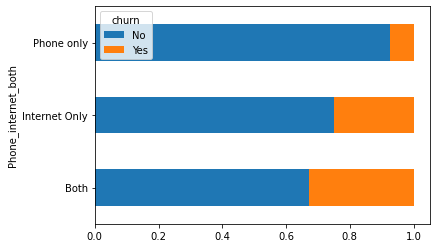

In [37]:
pib_ctab = pd.crosstab(df.Phone_internet_both, df.churn, normalize = 'index')
pib_ctab.plot(kind = 'barh', stacked = True)

In [38]:
pd.crosstab(df.is_senior_citizen, df.Phone_internet_both, normalize = 'index')

Phone_internet_both,Both,Internet Only,Phone only
is_senior_citizen,,,
No,0.652646,0.097863,0.249491
Yes,0.863398,0.091068,0.045534


In [39]:
pd.crosstab(df.is_senior_citizen, df.Phone_internet_both)

Phone_internet_both,Both,Internet Only,Phone only
is_senior_citizen,,,
No,3848,577,1471
Yes,986,104,52


<AxesSubplot:xlabel='Phone_internet_both', ylabel='tenure'>

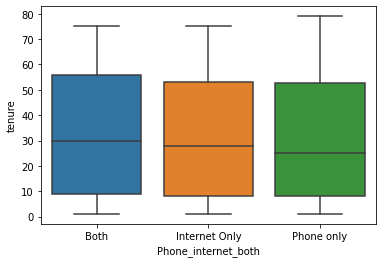

In [40]:
#churn rate vs tenure
sns.boxplot(data = df, y = 'tenure', x = 'Phone_internet_both')

In [41]:
pd.crosstab(df.tenure, df.Phone_internet_both, normalize = 'index')

Phone_internet_both,Both,Internet Only,Phone only
tenure,,,
1.0,0.631068,0.097087,0.271845
2.0,0.737069,0.081897,0.181034
3.0,0.647059,0.137255,0.215686
4.0,0.690058,0.128655,0.181287
5.0,0.673469,0.074830,0.251701
...,...,...,...
74.0,0.634146,0.024390,0.341463
75.0,0.266667,0.200000,0.533333
76.0,0.000000,0.000000,1.000000


<AxesSubplot:xlabel='payment_type', ylabel='tenure'>

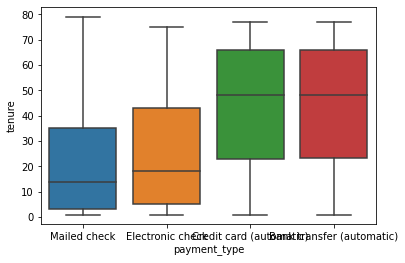

In [42]:
sns.boxplot(data = df, y = 'tenure', x = 'payment_type')

In [43]:
pd.crosstab(df.payment_type, df.churn)

churn,No,Yes
payment_type,,
Bank transfer (automatic),1287,259
Credit card (automatic),1291,232
Electronic check,1294,1071
Mailed check,1296,308


In [44]:
pd.crosstab(df.contract_type, df.Tenure_bucket, normalize='index')

Tenure_bucket,0-24,24-48,48-60,60+
contract_type,,,,
1year,0.204068,0.349831,0.233898,0.212203
2year,0.081209,0.154713,0.186129,0.577949
Month_to_month,0.690660,0.216460,0.064757,0.028122


In [46]:
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_churned,has_phone_and_internet,has_phone,has_internet,Concat Partners,partner_dependents,p_d_str,Tenure_bucket,Avg_ten_charge_check,Phone_internet_both
0,0002-ORFBO,Female,No,Yes,Yes,one_line,DSL,1year,Mailed check,65.6,...,False,True,True,True,YesYes,3.0,Par Dep,0-24,65.92222222,Both
1,0003-MKNFE,Male,No,No,No,two_p_phone,DSL,Month_to_month,Mailed check,59.9,...,False,True,True,True,NoNo,0.0,No Part No Dep,0-24,60.26666667,Both
2,0004-TLHLJ,Male,No,No,No,one_line,Fiber,Month_to_month,Electronic check,73.9,...,True,True,True,True,NoNo,0.0,No Part No Dep,0-24,70.2125,Both
3,0011-IGKFF,Male,Yes,Yes,No,one_line,Fiber,Month_to_month,Electronic check,98.0,...,True,True,True,True,YesNo,1.0,Part No Dep,0-24,95.21923077,Both
4,0013-EXCHZ,Female,Yes,Yes,No,one_line,Fiber,Month_to_month,Mailed check,83.9,...,True,True,True,True,YesNo,1.0,Part No Dep,0-24,89.13333333,Both


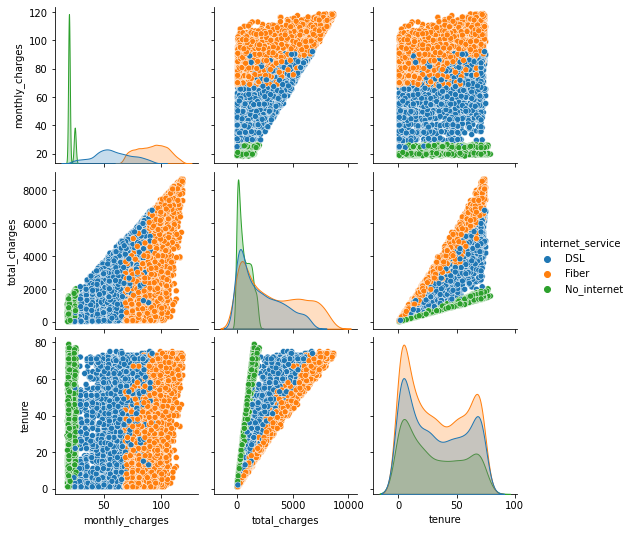

In [48]:
# Deep dive on internet
sns.pairplot(df[['monthly_charges', 'total_charges', 'tenure', 'internet_service']], hue = 'internet_service')


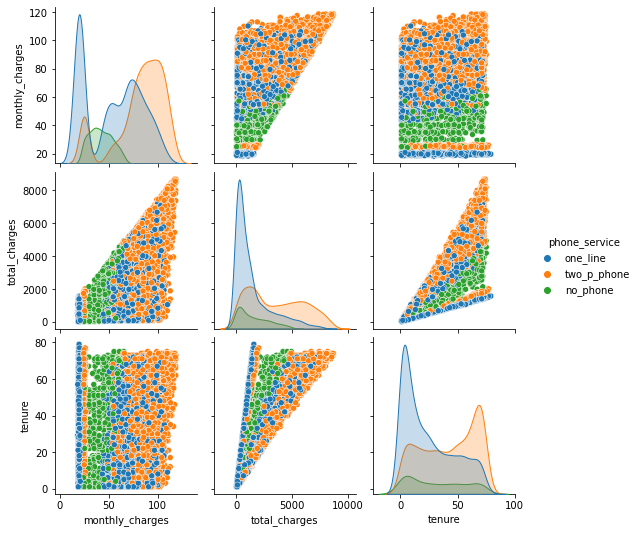

In [49]:
# Deep dive on phone
sns.pairplot(df[['monthly_charges', 'total_charges', 'tenure', 'phone_service']], hue = 'phone_service')

In [57]:
# Churned only data set
c_df = df[df['has_churned']== True]
nc_df = df[df['has_churned'] == False]
c_df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_churned,has_phone_and_internet,has_phone,has_internet,Concat Partners,partner_dependents,p_d_str,Tenure_bucket,Avg_ten_charge_check,Phone_internet_both
2,0004-TLHLJ,Male,No,No,No,one_line,Fiber,Month_to_month,Electronic check,73.9,...,True,True,True,True,NoNo,0.0,No Part No Dep,0-24,70.2125,Both
3,0011-IGKFF,Male,Yes,Yes,No,one_line,Fiber,Month_to_month,Electronic check,98.0,...,True,True,True,True,YesNo,1.0,Part No Dep,0-24,95.21923077,Both
4,0013-EXCHZ,Female,Yes,Yes,No,one_line,Fiber,Month_to_month,Mailed check,83.9,...,True,True,True,True,YesNo,1.0,Part No Dep,0-24,89.13333333,Both
18,0022-TCJCI,Male,Yes,No,No,one_line,DSL,1year,Credit card (automatic),62.7,...,True,True,True,True,NoNo,0.0,No Part No Dep,24-48,62.03333333,Both
19,0023-HGHWL,Male,Yes,No,No,no_phone,DSL,Month_to_month,Electronic check,25.1,...,True,False,False,True,NoNo,0.0,No Part No Dep,0-24,25.1,Internet Only


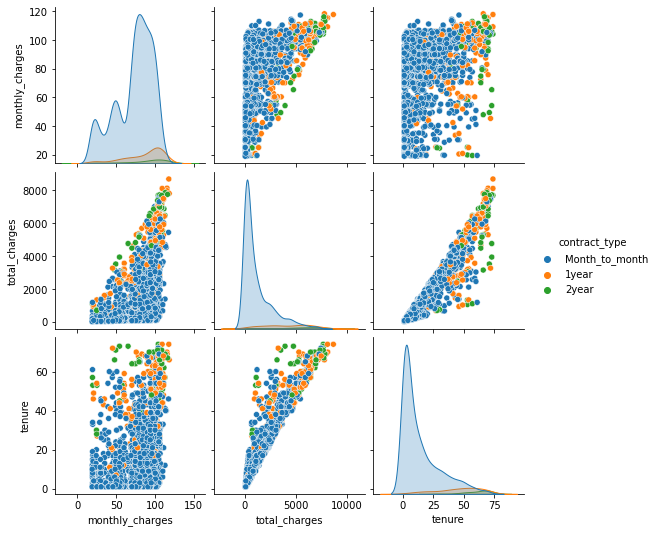

In [56]:
#churned pairplot by contract type
sns.pairplot(c_df[['monthly_charges', 'total_charges', 'tenure', 'contract_type']], hue = 'contract_type')

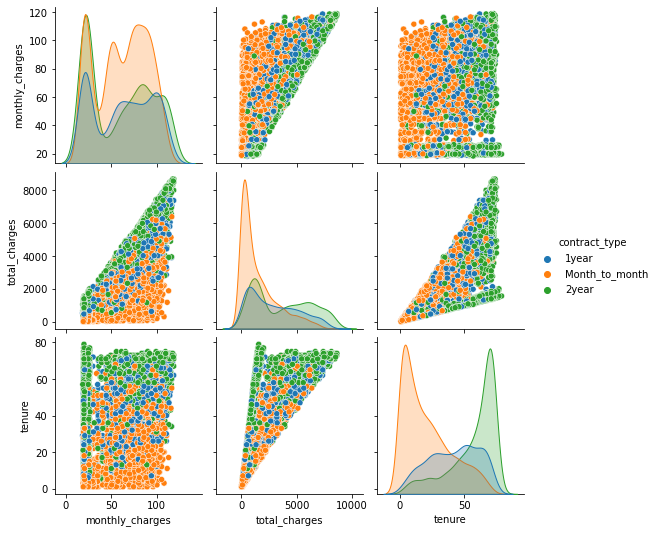

In [58]:
#Not churned pairplot by contract type
sns.pairplot(nc_df[['monthly_charges', 'total_charges', 'tenure', 'contract_type']], hue = 'contract_type')

In [59]:
#contract & Payment types on Churned
pd.crosstab(c_df.contract_type, df.payment_type, normalize = 'index')

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
contract_type,,,,
1year,0.228916,0.246988,0.385542,0.138554
2year,0.395833,0.270833,0.270833,0.062500
Month_to_month,0.121981,0.107488,0.600242,0.170290


<AxesSubplot:ylabel='contract_type'>

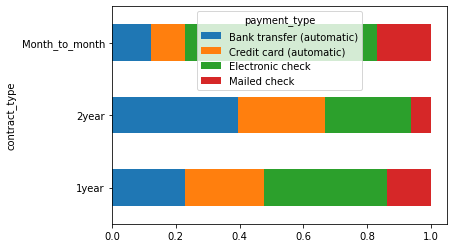

In [63]:
c_pvc = pd.crosstab(c_df.contract_type, c_df.payment_type, normalize = 'index')
c_pvc.plot(kind = 'barh', stacked = True)

In [64]:
#contract vs payment on non-churned
pd.crosstab(nc_df.contract_type, nc_df.payment_type, normalize = 'index')

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
contract_type,,,,
1year,0.271199,0.273491,0.216196,0.239114
2year,0.331910,0.346553,0.094570,0.226968
Month_to_month,0.174775,0.164414,0.385586,0.275225


<AxesSubplot:ylabel='contract_type'>

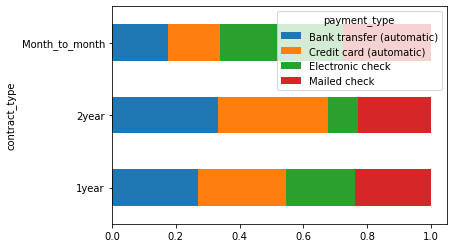

In [65]:
nc_pvc = pd.crosstab(nc_df.contract_type, nc_df.payment_type, normalize = 'index')
nc_pvc.plot(kind = 'barh', stacked = True)